# Análises Exploratória dos dados de treino

## Setup e imports

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd /content/drive/Shareddrives/ProjetoAM/music-inRecomendation/

/content/drive/Shareddrives/ProjetoAM/music-inRecomendation


In [16]:
df=pd.read_csv('data/dados_treino.csv')

In [17]:
df.head()

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
0,Eletrônica,True,True,False,True,True,False,False,True,110.275495,-6.322162,72.909014,16.308793,233021,2004,False,A#,True,True,2,#ID7758
1,Acústica,False,True,False,True,False,False,False,False,117.367073,-6.509007,72.654133,0.000000,166437,1999,False,E,True,True,8,#ID7758
2,Acústica,True,False,True,False,False,False,False,False,100.134208,-12.717853,74.129557,0.000000,159426,2002,False,c,False,False,5,#ID7758
3,Eletrônica,True,False,False,True,True,False,False,True,105.056053,-8.088894,78.123907,18.818652,244636,1991,False,g,False,False,2,#ID7758
4,Acústica,False,False,True,True,False,False,False,False,95.707941,-7.564842,74.159074,0.000000,166520,2018,False,d#,False,True,7,#ID7758


## Data cleaning

Para cada uma das colunas verificar dados inconsistêntes

*e.g* 
* Tempo negativo
* % > 100
*  


In [18]:
print(len(df))


4926


In [19]:
print(len(df))
df.query('duracao >0', inplace=True)


4926


In [20]:
print(len(df))
df.query('PctCantada <= 100 & PctCantada>=0',inplace=True)


4922


In [21]:
print(len(df))
df.query('PctRap <= 100 & PctRap>=0',inplace=True)
print(len(df))


4922
4921


In [29]:
len(df[df.modo.isna()])

438

Temos uma quantidade consideravel de musicas sem um modo definido (438).

In [36]:
df[df.modo.isna()].agg({'unique'}).loc[:,'bateria':'Tem_Instr_Cordas']

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas
unique,"[Acústica, Eletrônica, Nenhuma]","[False, True]","[True, False]","[False, True]","[False, True]","[True, False]","[True, False]","[True, False]","[False, True]"


Percebemos que são músicas que podem possuir  todos instrumentos, inclusive os harmonicos e melódicos, o que indica que a ausencia de uma tonalidade é realmente um dado faltante.

In [42]:
print('Músicas por cliente')
display(df.id_cliente.value_counts().to_frame())
print('Músicas por cliente (sem a tonalidade)')
display(df[df.modo.isna()].id_cliente.value_counts().to_frame())

Músicas por cliente


,id_cliente
#ID7758,2473
#ID4820,2448


Músicas por cliente (sem a tonalidade)


,id_cliente
#ID4820,231
#ID7758,207


Como podemos notar, por volta de 10% das músicas para cada cliente não possuem uma tonalidade indicada, o que pode ser considerada uma perda razoável de informação.

In [ ]:
df.agg({'unique'})

,bateria,Tem_Instr_Violao_Viola,Tem_Instr_Guitarra,Tem_Instr_Cavaco,Tem_Instr_Sintetizador_Teclado,Tem_Instr_Piano,Tem_Instr_Metais,Tem_Instr_Madeiras,Tem_Instr_Cordas,BPM,VolMedio,PctCantada,PctRap,duracao,ano_lancamento,aovivo,modo,explicita,gostou,n_reproducao,id_cliente
unique,"[Eletrônica, Acústica, Nenhuma]","[True, False]","[True, False]","[False, True]","[True, False]","[True, False]","[False, True]","[False, True]","[True, False]","[110.275495473565, 117.367073297504, 100.13420...","[-6.3221624510694, -6.50900651603091, -12.7178...","[72.90901423020841, 72.6541325899253, 74.12955...","[16.308793195307, 0.0, 18.8186518137422, 62.53...","[233021, 166437, 159426, 244636, 166520, 18398...","[2004, 1999, 2002, 1991, 2018, 2016, 2001, 201...","[False, True]","[A#, E, c, g, d#, C#, a, f#, C, nan, d, f, F#,...","[True, False]","[True, False]","[2, 8, 5, 7, 3, 4, 6, 1, 9, 10, 11]","[#ID7758, #ID4820]"


In [ ]:
df.groupby('id_cliente')['gostou'].value_counts()

id_cliente  gostou
#ID4820     False     1884
            True       567
#ID7758     False     1614
            True       861
Name: gostou, dtype: int64

In [ ]:
cliente1 = df[df.id_cliente=="#ID7758"]

In [ ]:
df.isna().any()

bateria                           False
Tem_Instr_Violao_Viola            False
Tem_Instr_Guitarra                False
Tem_Instr_Cavaco                  False
Tem_Instr_Sintetizador_Teclado    False
Tem_Instr_Piano                   False
Tem_Instr_Metais                  False
Tem_Instr_Madeiras                False
Tem_Instr_Cordas                  False
BPM                               False
VolMedio                          False
PctCantada                        False
PctRap                            False
duracao                           False
ano_lancamento                    False
aovivo                            False
modo                               True
explicita                         False
gostou                            False
n_reproducao                      False
id_cliente                        False
dtype: bool

In [ ]:
df.VolMedio.describe()

count    4926.000000
mean       -8.286731
std         2.992631
min       -35.309181
25%        -9.163971
50%        -7.554104
75%        -6.490785
max         1.329307
Name: VolMedio, dtype: float64

In [ ]:
df.modo.value_counts(dropna=False)

NaN    439
C      350
F      334
G      260
c      260
a      233
d      228
g      222
D      207
b      203
A#     194
f      189
e      187
A      178
G#     178
E      173
D#     172
d#     161
C#     132
c#     132
B      122
a#     120
f#      88
F#      82
g#      82
Name: modo, dtype: int64

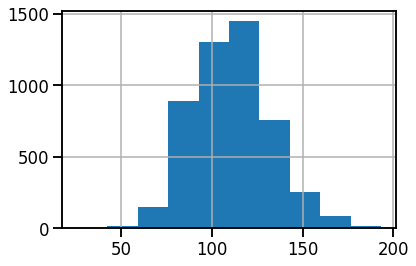

In [ ]:
df.BPM.hist()

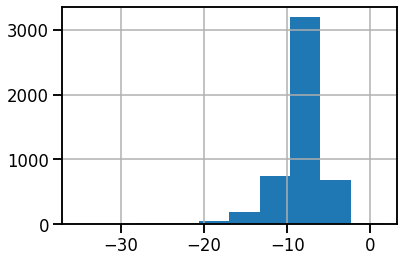

In [ ]:
df.VolMedio.hist()

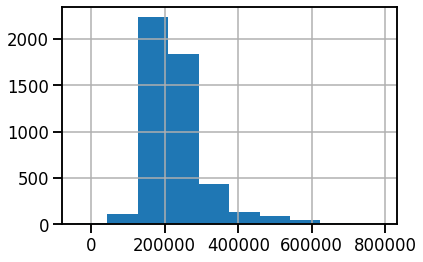

In [ ]:
df.duracao.hist()

In [ ]:
df.duracao.describe()

count      4926.000000
mean     230453.678238
std       84799.375985
min      -38798.000000
25%      179618.750000
50%      211826.500000
75%      256761.750000
max      789083.000000
Name: duracao, dtype: float64

É interessante notar que os `modos` estão apresentados através das letras **maiusculas** representando **tonalidades maiores** e **minusculas** representando **tonalidades menores**

In [ ]:
modos_counts=df.modo.value_counts(dropna=False).reset_index().rename(columns={'index':'tonalidade','modo':'contagem'})

In [ ]:
modos_counts.fillna("N_spec", inplace=True)

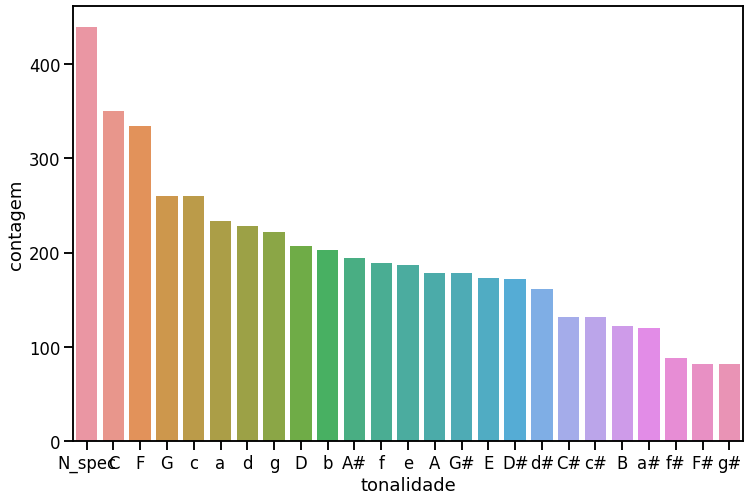

In [ ]:
plt.figure(figsize=(12,8))
sns.set_context('talk')
ax=sns.barplot(x="tonalidade",y="contagem", data=modos_counts)

In [80]:
df['tom_menor']=df.modo.str.islower()

In [81]:
def tom(df):
  if df.tom_menor == True:
    return 'menor'
  else:
    return 'maior'
df['tom']=df.apply(tom, axis=1)

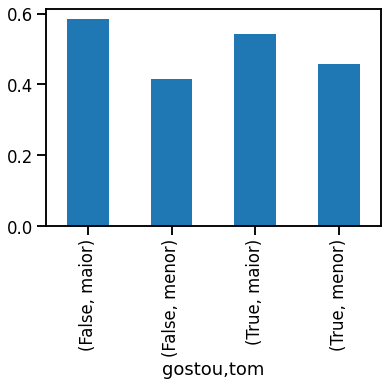

In [86]:
df.groupby('gostou')['tom'].value_counts(normalize=True).plot(kind='bar')

## Estudando a presença de instrumentos

Heatmap instrumentos pareados

In [44]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']

In [48]:
inst=inst.astype(int)

In [50]:
inst=inst.T.dot(inst)

### Matriz de Coocorrencia

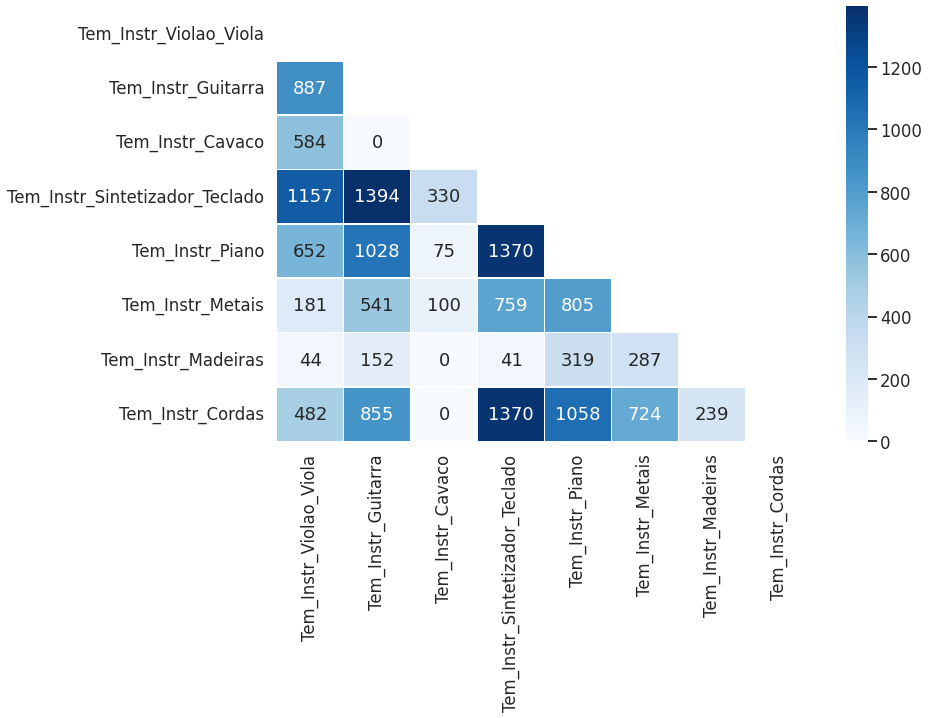

In [63]:
sns.set_context('talk')
mask = np.zeros_like(inst)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(inst, mask=mask,linewidths=.5, annot=True,fmt="d", cmap='Blues')

In [67]:
inst=df.loc[:,'Tem_Instr_Violao_Viola':'Tem_Instr_Cordas']

In [70]:
instcorr=inst.corr()

### Matriz de correlação

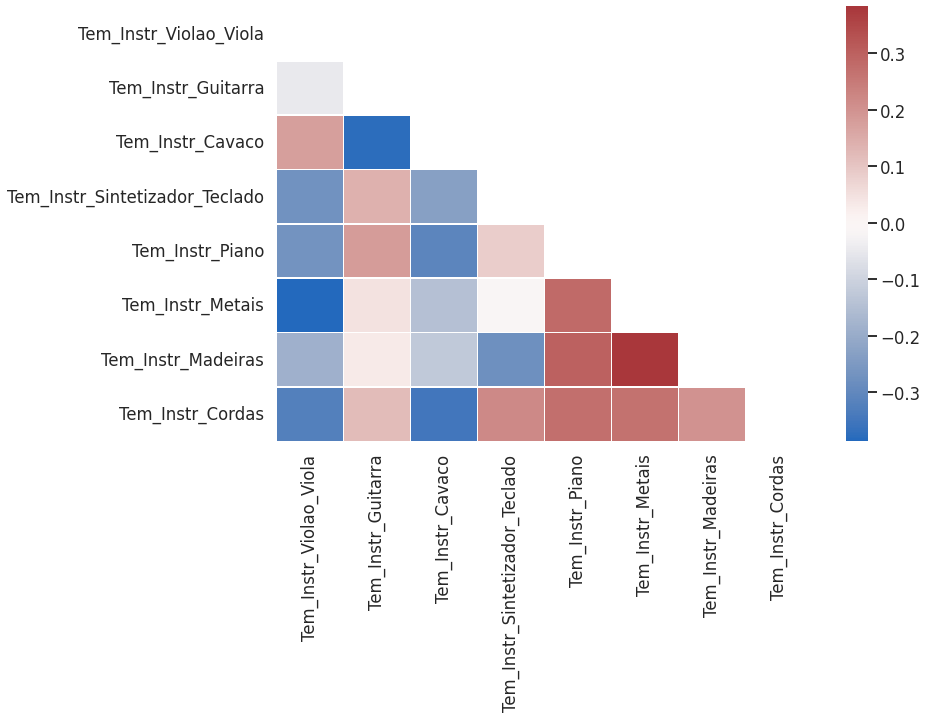

In [74]:
sns.set_context('talk')
mask = np.zeros_like(instcorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(instcorr, mask=mask,linewidths=.5, cmap='vlag')

## Explorar relação plays x gosto do usuario

Como ponderar o "não gostei mas ouvi muitas vezes" x "gostei mas ouvi pouco"

In [ ]:
cliente1.groupby('gostou')['n_reproducao'].value_counts(bins=4)

gostou              
False   (0.991, 3.0]    1079
        (3.0, 5.0]       451
        (5.0, 7.0]        77
        (7.0, 9.0]         7
True    (3.0, 5.0]       345
        (0.991, 3.0]     343
        (5.0, 7.0]       150
        (7.0, 9.0]        23
Name: n_reproducao, dtype: int64

In [ ]:
cliente1.columns

Index(['bateria', 'Tem_Instr_Violao_Viola', 'Tem_Instr_Guitarra',
       'Tem_Instr_Cavaco', 'Tem_Instr_Sintetizador_Teclado', 'Tem_Instr_Piano',
       'Tem_Instr_Metais', 'Tem_Instr_Madeiras', 'Tem_Instr_Cordas', 'BPM',
       'VolMedio', 'PctCantada', 'PctRap', 'duracao', 'ano_lancamento',
       'aovivo', 'modo', 'explicita', 'gostou', 'n_reproducao', 'id_cliente'],
      dtype='object')

## Gosto baseado no ano de lançamento

n de músicas que gostou em x ano / n de músicas daquele ano contidas na base

Transformação dados de ano de lançamento por decada

